In [1]:
from optinum import base_ops

In [2]:
?? base_ops

Type:        module
String form: <module 'optinum.base_ops' from '/Users/vladimir/Documents/VS_Code/Num_analysis/part 2/exam/optinum/optinum/base_ops.py'>
File:        ~/Documents/VS_Code/Num_analysis/part 2/exam/optinum/optinum/base_ops.py
Source:     
from typing import List

def add(matrix_a: List[List], matrix_b: List[List]) -> List[List]:
    """
    Складывает две матрицы одинакового размера.
    
    :param matrix_a: Первая матрица
    :param matrix_b: Вторая матрица
    :return: Результирующая матрица, представляющая собой сумму matrix_a и matrix_b
    """
    return [[matrix_a[i][j] + matrix_b[i][j] for j in range(len(matrix_a[0]))] for i in range(len(matrix_a))]

def subtract(matrix_a: List[List], matrix_b: List[List]) -> List[List]:
    """
    Вычитает одну матрицу из другой матрицы одинакового размера.
    
    :param matrix_a: Первая матрица
    :param matrix_b: Вторая матрица
    :return: Результирующая матрица, представляющая собой разность matrix_a и matrix_b
    """
 

In [3]:
from optinum.base_ops import strassen_multiply

In [4]:
A = [[1, 2], [3, 4]]
B = [[5, 6], [7, 8]]

strassen_multiply(A, B)

[[19, 22], [43, 50]]

In [5]:
import numpy as np
np.dot(A, B) # same as strassen_multiply(A, B)

array([[19, 22],
       [43, 50]])

In [6]:
from optinum.signal import dft, idft

In [7]:
a = [1, 2, 3, 4]
dft(a).round(2)

array([10.+0.j, -2.+2.j, -2.-0.j, -2.-2.j])

In [8]:
idft(dft(a)).round(2)

array([1.-0.j, 2.-0.j, 3.-0.j, 4.+0.j])

In [9]:
?? dft

Signature:  dft(x: numpy.ndarray[numpy.complex128]) -> numpy.ndarray[numpy.complex128]
Source:   
def dft(x: np.ndarray[np.complex128]) -> np.ndarray[np.complex128]:
    """
    Вычисляет дискретное преобразование Фурье (ДПФ) входного сигнала.

    Функция реализует ДПФ, используя матричное умножение для эффективного вычисления.

    Параметры
    ----------
    x : np.ndarray[np.complex128]
        Входной сигнал как массив комплексных чисел

    Возвращает
    ----------
    np.ndarray[np.complex128]
        Результат ДПФ - массив комплексных чисел той же длины, что и входной сигнал

    Пример
    -------
    >>> x = np.array([1+0j, 2+0j, 3+0j, 4+0j])
    >>> dft(x)
    array([ 10.+0.j,  -2.+2.j,  -2.+0.j,  -2.-2.j])
    """
    N = len(x)
    n = np.arange(N)[:, None]  # Create a column vector of n
    k = np.arange(N)[None, :]  # Create a row vector of k
    W = np.exp(-2j * np.pi * k * n / N)  # Calculate the DFT matrix using broadcasting
    return x @ W
File:      ~/Documents/V

In [10]:
from optinum.signal import fft, ifft

In [11]:
fft(a).round(2)

array([10.+0.j, -2.+2.j, -2.-0.j, -2.-2.j])

In [12]:
ifft(fft(a)).round(2)

array([1.-0.j, 2.-0.j, 3.-0.j, 4.+0.j])

In [13]:
?? fft

Signature:  fft(x: numpy.ndarray[numpy.complex128]) -> numpy.ndarray[numpy.complex128]
Docstring:
Быстрое преобразование Фурье (БПФ) с использованием алгоритма Cooley-Tukey.

Параметры:
----------
x : np.ndarray[np.complex128]
    Входной массив комплексных чисел
    
Возвращает:
-----------
np.ndarray[np.complex128]
    Результат БПФ
Source:   
def fft(x: np.ndarray[np.complex128]) -> np.ndarray[np.complex128]:
    """
    Быстрое преобразование Фурье (БПФ) с использованием алгоритма Cooley-Tukey.
    
    Параметры:
    ----------
    x : np.ndarray[np.complex128]
        Входной массив комплексных чисел
        
    Возвращает:
    -----------
    np.ndarray[np.complex128]
        Результат БПФ
    """
    original_N = len(x)
    N = len(x)
    
    # Дополняем входной массив нулями до ближайшей степени двойки
    if N & (N-1) != 0:
        next_power_2 = 1 << (N - 1).bit_length()
        x = np.pad(x, (0, next_power_2 - N), mode='constant')
        N = next_power_2
    
    # Базов

In [14]:
from optinum.ode import solve_ode_central_diff, solve_ode_system_central_diff

In [15]:
def f(y, x):
  return y/(np.cos(x)**2)

def g(y, x):
  return y/(np.sin(x)**3)

n = 10
h = 0.1
y0 = 2.7183
y1 = 2.9901
z0 = 2.7777
z1 = 2.3333
x0 = 0

In [16]:
solve_ode_central_diff(n, h, y0, y1, x0, f) # one equation

[2.7183,
 2.9901,
 3.3223402951015806,
 3.681871954242613,
 4.1291775526817,
 4.655328953011827,
 5.338116586344448,
 6.222646074760069,
 7.465576699227517,
 9.298695941123842]

In [17]:
solve_ode_system_central_diff(n, h, y0, y1, z0, z1, x0, f, g) # two equations

([2.7183,
  2.9901,
  3.3223402951015806,
  3.681871954242613,
  4.1291775526817,
  4.655328953011827,
  5.338116586344448,
  6.222646074760069,
  7.465576699227517,
  9.298695941123842],
 [2.7777,
  2.3333,
  471.77762514680643,
  12035.359128011678,
  93738.66950723065,
  329503.076596275,
  691772.8066157381,
  1098054.3587052543,
  1513175.0842844746,
  1917867.370230969])

In [18]:
from optinum.ode import solve_ode_euler, solve_ode_runge_kutta, solve_ode_predictor_corrector

In [19]:
def f(x, y):
    return x + y
x0, y0 = 0, 1
x_end = 1
h = 0.1
x_vals, y_vals = solve_ode_predictor_corrector(f, x0, y0, x_end, h)

In [20]:
x_vals, y_vals

([0,
  0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6,
  0.7,
  0.7999999999999999,
  0.8999999999999999,
  0.9999999999999999,
  1.0999999999999999],
 [1,
  1.11,
  1.24205,
  1.39846525,
  1.5818041012500001,
  1.7948935318812502,
  2.0408573527287817,
  2.3231473747653038,
  2.6455778491156607,
  3.012363523272805,
  3.42816169321645,
  3.898118671004177])

In [21]:
def f(x, y):
    return x + y
x0, y0 = 0, 1
x_end = 1
h = 0.1
x_vals, y_vals = solve_ode_runge_kutta(f, x0, y0, x_end, h)
x_vals, y_vals

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 array([1.        , 1.11034167, 1.24280514, 1.39971699, 1.58364848,
        1.79744128, 2.04423592, 2.32750325, 2.65107913, 3.01920283,
        3.43655949, 3.90832698]))

In [22]:
def f(x, y):
    return x + y
x0, y0 = 0, 1
x_end = 1
h = 0.1
x_vals, y_vals = solve_ode_euler(f, x0, y0, x_end, h)
x_vals, y_vals

([0,
  0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6,
  0.7,
  0.7999999999999999,
  0.8999999999999999,
  0.9999999999999999],
 [1,
  1.1,
  1.2200000000000002,
  1.362,
  1.5282,
  1.72102,
  1.943122,
  2.1974342,
  2.48717762,
  2.8158953820000003,
  3.1874849202])

In [33]:
from optinum.plotting.ode import plot_ode_solution, plot_ode_methods_comparison

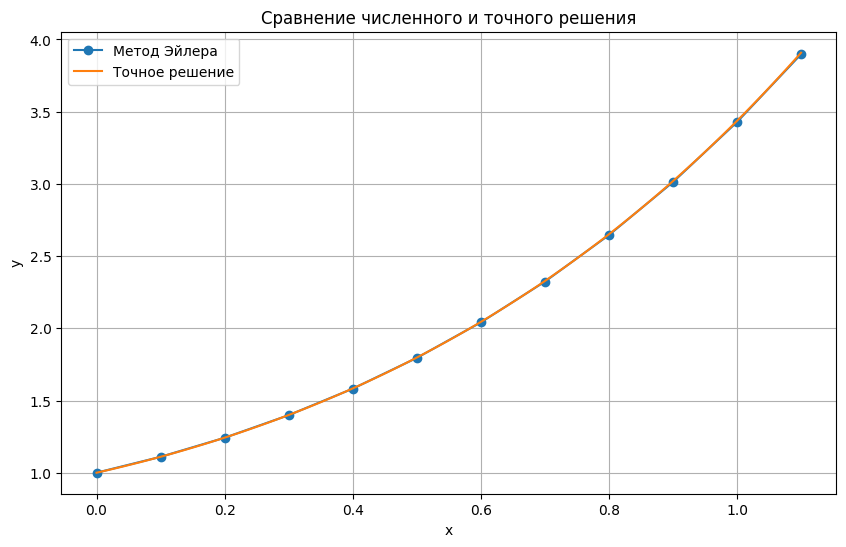

In [29]:
import numpy as np

def f(x, y):
    return x + y
x0, y0 = 0, 1
x_end = 1
h = 0.1
x_vals, y_vals = solve_ode_predictor_corrector(f, x0, y0, x_end, h)

def exact_solution(x):
    return -x - 1 + 2 * np.exp(x)


plot_ode_solution(x_vals, y_vals, exact_solution=exact_solution, method_name="Метод Эйлера", x0=0, x_end=1.1)

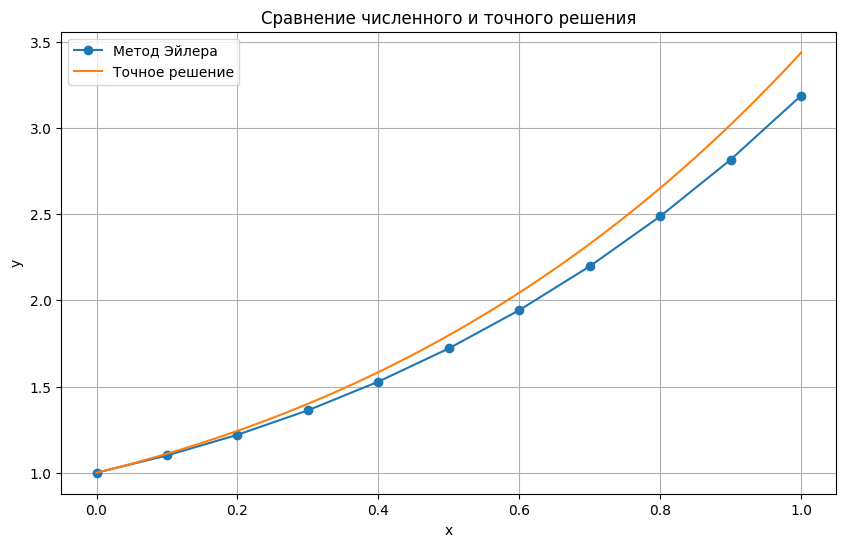

In [40]:
import numpy as np

def f(x, y):
    return x + y
x0, y0 = 0, 1
x_end = 1
h = 0.1
x_vals, y_vals = solve_ode_euler(f, x0, y0, x_end, h)

def exact_solution(x):
    return -x - 1 + 2 * np.exp(x)


plot_ode_solution(x_vals, y_vals, exact_solution=exact_solution, method_name="Метод Эйлера", x0=0, x_end=1)

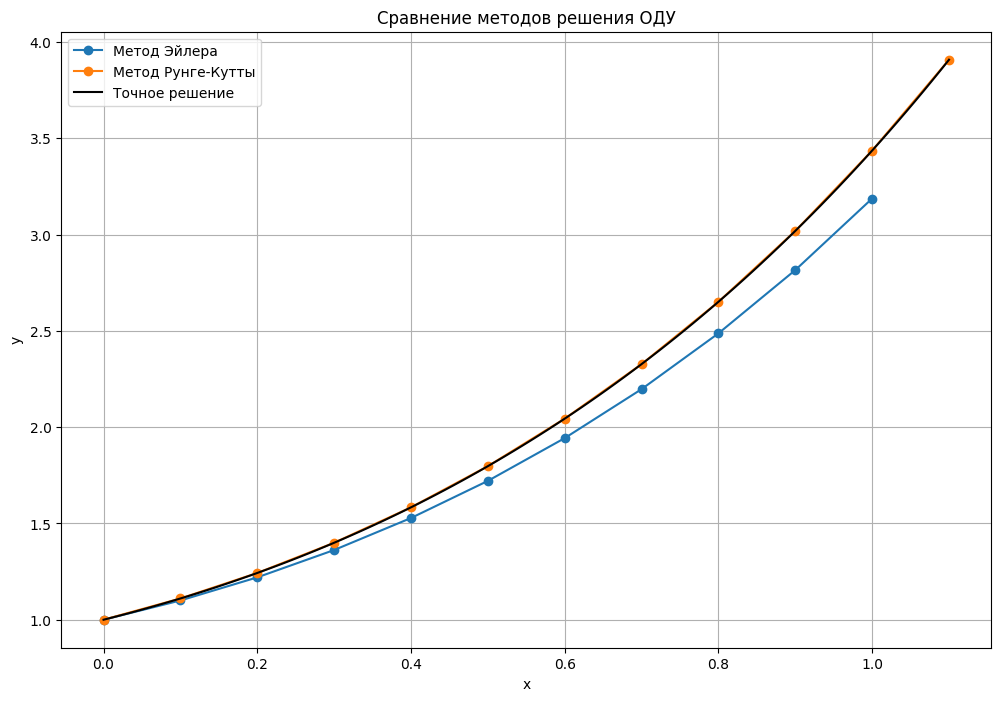

In [42]:
import numpy as np
def exact_solution(x):
    return -x - 1 + 2 * np.exp(x)

x1, y1 = solve_ode_euler(f, x0, y0, x_end, h)
x2, y2 = solve_ode_runge_kutta(f, x0, y0, x_end, h)

methods_results = {
     "Метод Эйлера": (x1, y1),
     "Метод Рунге-Кутты": (x2, y2)}
plot_ode_methods_comparison(methods_results, exact_solution=exact_solution, x0=0, x_end=1.1)